<div style="text-align: center; padding-top:25px">
    <div style="   padding-top: 25px;
                   font-weight:700;
                   letter-spacing:1px; 
                   line-height:1.2;">
        <p style=" font-size:30px; 
                   color: #0F52BA;
                   text-transform: uppercase;
                   text-align: center;
                   padding-bottom: 6px;
                   border-bottom: 1px solid #4169E1;">⚡ Interconnect ⚡</p>
        <p style=" margin: 0;
                   padding-top: 6px;
                   font-size:24px;
                   text-align: center;">Clients Churn Prediction using ML</p>
    </div>
</div>

# Contents <a id='contents'></a>

[1. Contents](#contents)   
[2. Introduction](#introduction)  
[3. Project Goal](#project_goal)  
[4. Initialization](#initialization)  
[5. Load data](#load-data)  
[6. Data Description](#data-description)     
[7. Data Preprocessing](#data-preprocessing)   
[8. Feature Engineering](#feature-engineering)   
[9. Exploratory Data Analysis](#eda)  
[10. Data Preparation for Model Building](#data-preparation-for-model-building)  
[11. Model Building](#model-building)  
[12. Test the best model on test data](#test-the-best-model)  
[13. Conclusion](#conclusion)  

# 1. Introduction <a id='introduction'></a> 
[Back to Contents](#contents)

In an era of rapid technological evolution, **Interconnect** is a leading telecom operator that mainly provides two types of services:

1. **Landline communication**: The telephone can be connected to several lines simultaneously.
2. **Internet**: The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- **Internet security**: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

Interconnect strives to provide seamless connectivity and an array of services to its valued clients. However, the telecommunications industry is highly competitive, and customer churn remains a significant challenge. As clients have more choices than ever before, it is crucial for Interconnect to predict and mitigate customer churn effectively.

To address this concern, we introduce this project, which is a comprehensive initiative designed **to empower Interconnect with the tools and insights needed to identify clients at risk of leaving and, more importantly, to take proactive measures to retain their loyalty**.

By leveraging a wealth of data, including client contracts, personal information, and service usage, this project employs advanced analytics and predictive modeling techniques to forecast customer churn. **When clients exhibit signs of potential churn, they will be offered tailored solutions such as promotional codes and specialized plan options**. This personalized approach aims to enhance client satisfaction and extend their tenure with Interconnect.

# 2. Project Goal <a id='project-goal'></a> 
[Back to Contents](#contents)

The primary goal of this project is **to reduce client churn and enhance client retention for Interconnect by leveraging data-driven insights**. Specifically, our goal is to:

1. **Minimize Client Churn**: Develop and implement predictive models to identify clients at risk of leaving our services. The aim is to minimize the client churn rate by a significant percentage.

2. **Proactively Retain Clients**: Offer personalized solutions, including promotional codes and customized plan options, to at-risk clients before they decide to leave. We aim to engage with clients in a way that encourages them to stay with Interconnect.

3. **Increase Long-Term Client Loyalty**: Foster long-lasting relationships with clients, extending their tenure with Interconnect.

4. **Achieve Sustainable Growth**: By retaining existing clients and reducing churn, this project aims to contribute to Interconnect's sustainable growth and financial stability in the highly competitive telecommunications industry.

# 3. Initialization <a id='initialization'></a>  
[Back to Contents](#contents)

In [1]:
# Import base libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML models from scikit-learn
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Import metrics functions from scikit-learn
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# Import other utility functions from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


# Suppress warnings
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load

# 4. Load data <a id='load-data'></a>  
[Back to Contents](#contents)

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.  

The data is located on the platform in the `/datasets/final_provider/` folder. Let's load each of the files provided.

In [2]:
# Load the data from the files
df_contract = pd.read_csv('./datasets/final_provider/contract.csv')
df_personal = pd.read_csv('./datasets/final_provider/personal.csv')
df_internet = pd.read_csv('./datasets/final_provider/internet.csv')
df_phone = pd.read_csv('./datasets/final_provider/phone.csv')

Great! We have the data successfully loaded.

# 5. Data Description <a id='data-description'></a>  
[Back to Contents](#contents)

Let's get the details of the columns present in each files.

## Contract - `df_contract`

Let's first get a peek of the data in the file:

In [3]:
# Get first 5 records
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Great! Let's now get a list of all the columns and possibly a brief description:

In [4]:
# Get general info of the dataframe
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


So, we've the following columns in the `contract` datafile provided by the company:  

| Column Name      | Description                                |
|:------------------|:--------------------------------------------|
| customerID       | Unique code assigned to each client        |
| BeginDate        | Start date of the client's contract        |
| EndDate          | End date of the client's contract          |
| Type             | Type of service (e.g., landline, internet) |
| PaperlessBilling | Billing method (paperless or not)          |
| PaymentMethod    | Payment method used by the client          |
| MonthlyCharges   | Monthly service charges for the client     |
| TotalCharges     | Total charges incurred by the client       |

## Personal - `df_personal`

Let's first get a peek of the data in the file:

In [5]:
# Get first 5 records
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Great! Let's now get a list of all the columns and possibly a brief description:

In [6]:
# Get general info of the dataframe
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


So, we've the following columns in the `personal` datafile provided by the company:  

| Column Name   | Description                                                            |
|:---------------|:------------------------------------------------------------------------|
| customerID    | Unique code assigned to each client                                    |
| gender        | Gender of the client (e.g., Male, Female)                              |
| SeniorCitizen | Indicates whether the client is a senior citizen (1 for Yes, 0 for No) |
| Partner       | Indicates whether the client is/has a partner (Yes or No)                 |
| Dependents    | Indicates whether the client has dependents (Yes or No)                |

## Internet - `df_internet`

Let's first get a peek of the data in the file:

In [7]:
# Get first 5 records
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Great! Let's now get a list of all the columns and possibly a brief description:

In [8]:
# Get general info of the dataframe
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


So, we've the following columns in the `internet` datafile provided by the company:  

| Column Name      | Description                                                         |
|:------------------|:---------------------------------------------------------------------|
| customerID       | Unique code assigned to each client                                 |
| InternetService  | Type of internet service (e.g., DSL, Fiber optic)                   |
| OnlineSecurity   | Indicates whether online security service is provided (Yes or No)   |
| OnlineBackup     | Indicates whether online backup service is provided (Yes or No)     |
| DeviceProtection | Indicates whether device protection service is provided (Yes or No) |
| TechSupport      | Indicates whether technical support service is provided (Yes or No) |
| StreamingTV      | Indicates whether streaming TV service is provided (Yes or No)      |
| StreamingMovies  | Indicates whether streaming movies service is provided (Yes or No)  |

## Phone - `df_phone`

Let's first get a peek of the data in the file:

In [9]:
# Get first 5 records
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Great! Let's now get a list of all the columns and possibly a brief description:

In [10]:
# Get general info of the dataframe
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


So, we've the following columns in the `phone` datafile provided by the company:  

| Column Name   | Description                                                       |
|:---------------|:-------------------------------------------------------------------|
| customerID    | Unique code assigned to each client                               |
| MultipleLines | Indicates whether the client has multiple lines (e.g., No or Yes) |

Great! So, now since we know about the structure of data we are going to deal with, few things that we can conclude are:
1. **we need to  rename all the columns to snake_case for better understanding**.
2. **we also have to fix the datatypes of cetain columns in all the dataframes**.

We'll take care of all of these in the data processing.

# 6. Data Preprocessing <a id='data-preprocessing'></a>  
[Back to Contents](#contents)

Data preprocessing is a crucial step in machine learning projects where raw data is transformed into a format that is more suitable for modeling. It involves cleaning, transforming, and organizing the data to make it understandable and usable by machine learning algorithms. Data preprocessing significantly impacts the performance and accuracy of machine learning models.

## Rename all the columns to `snake_case`

Renaming columns to `snake_case`, where each word is lowercase and separated by underscores, offers several advantages in terms of **readability, consistency, and compatibility with programming conventions**. Since we are dealing with 4 DataFrames, let's create a function that does our job and then, we can call all the DataFrames in a loop to rename the columns.

In [11]:
# Function to rename all the columns in a DataFrame
def rename_columns_in_df(df: pd.DataFrame, new_column_names: list[str]):
    """
    This function takes:
        1. DataFrame whose columns names have to be changed
        2. List of new columns names of the DataFrame in order
    And prints and changes the DataFrame with the new column names
    """
    
    # Get & print the old column names
    old_column_names = df.columns.to_list()
    print('Old Column Names before change:')
    display(old_column_names)
    
    # Change old to new column names
    columns_names_to_change = dict(zip(old_column_names, new_column_names))
    df.rename(columns=columns_names_to_change, inplace=True)
    
    # Print the new column names    
    print('New Column Names after change:')
    display(df.columns.to_list())  
    
    print('-'* 100)

Let's make a list of all the four DataFrames and their supposed new column names and loop over it to change the columns names:

In [12]:
# List of DataFrames and their supposed new column names
dfs_with_new_columns = [
    {
        "name": "Contract",
        "df": df_contract,
        "new_column_names": ["customer_id", "begin_date", "end_date", "type", "paperless_billing", "payment_method", "monthly_charges", "total_charges"]
    },
    {
        "name": "Personal",
        "df": df_personal,
        "new_column_names": ["customer_id", "gender", "senior_citizen", "partner", "dependents"]
    },
    {
        "name": "Internet",
        "df": df_internet,
        "new_column_names": ["customer_id", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]
    },
    {
        "name": "Phone",
        "df": df_phone,
        "new_column_names": ["customer_id", "multiple_lines"]
    }
]

In [13]:
# Loop over the DataFrames to change the columns names
for item in dfs_with_new_columns:
    print()
    print(f'\033[1mDataFrame: {item["name"]}\033[0m')
    rename_columns_in_df(item["df"], item["new_column_names"])


DataFrame: Contract
Old Column Names before change:


['customerID',
 'BeginDate',
 'EndDate',
 'Type',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

New Column Names after change:


['customer_id',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges']

----------------------------------------------------------------------------------------------------

DataFrame: Personal
Old Column Names before change:


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']

New Column Names after change:


['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

----------------------------------------------------------------------------------------------------

DataFrame: Internet
Old Column Names before change:


['customerID',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

New Column Names after change:


['customer_id',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

----------------------------------------------------------------------------------------------------

DataFrame: Phone
Old Column Names before change:


['customerID', 'MultipleLines']

New Column Names after change:


['customer_id', 'multiple_lines']

----------------------------------------------------------------------------------------------------


Awesome! It is looking great! Let's proceed with our next data processing step.

## Get a general report on all the DataFrames

Before proceeding further, we'll get a general report on all the DataFrames one by one. We'll write a function to get the report and run it in loop to get the results. Let's go.

In [14]:
def get_df_general_report(name: str, df: pd.DataFrame):
    """
    This function takes a DataFrame and its name as arguments and prints:
        1. Shape of the DataFrame
        2. Random 10 records,
        3. General Information about the DataFrame
        4. Descriptive Statistics of the DataFrame
        5. If the DataFrame has rows with explicit missing values
        6. If the DataFrame has rows with explicit duplicate values
    """
    print()
    print(f'\033[1mDataFrame: {item["name"]}\033[0m')

    print()
    print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')
    
    print()
    print('Random 10 records from the DataFrame are as follows:')
    display(df.sample(n=10, random_state=12345))
    
    print()
    print('The General Information about the DataFrame is as follows:')
    display(df.info())
    
    print()
    print('The Descriptive Statistics of the DataFrame for numerical columns:')
    display(df.describe())
    
    print()
    print('The Descriptive Statistics of the DataFrame for non-numerical columns:')
    display(df.describe(include=[object]))

    print()
    print('The number of missing values per column in the DataFrame are:')
    display(df.isna().sum())
    
    print()
    print('The number of rows with explicit duplicate values in the DataFrame are:')
    display(df.duplicated().sum())
    print()
    
    print('-'* 100)

In [15]:
# List of DataFrames and their names
list_of_dfs = [
    {
        "name": "Contract",
        "df": df_contract
    },
    {
        "name": "Personal",
        "df": df_personal
    },
    {
        "name": "Internet",
        "df": df_internet
    },
    {
        "name": "Phone",
        "df": df_phone
    }
]

In [16]:
# Loop over the DataFrames to get the report
for item in list_of_dfs:
    get_df_general_report(item["name"], item["df"])


DataFrame: Contract

The DataFrame has 7043 rows and 8 columns

Random 10 records from the DataFrame are as follows:


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
1128,0098-BOWSO,2017-11-01,No,Month-to-month,Yes,Electronic check,19.40,529.8
2875,9992-RRAMN,2018-02-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,85.10,1873.7
1783,8380-PEFPE,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,71.65,71.65
3804,9773-PEQBZ,2019-04-01,No,Month-to-month,No,Electronic check,79.85,797.25
6087,8319-QBEHW,2017-12-01,No,One year,Yes,Bank transfer (automatic),39.95,1023.75
2071,3392-EHMNK,2014-07-01,No,Two year,No,Credit card (automatic),94.10,6302.8
2395,6486-LHTMA,2017-07-01,No,One year,Yes,Electronic check,90.70,2835.5
4660,0883-EIBTI,2019-10-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,19.50,31.55
372,6122-EFVKN,2018-02-01,No,Two year,No,Mailed check,35.75,830.8
1143,2446-ZKVAF,2018-08-01,No,Month-to-month,No,Credit card (automatic),56.80,1074.65



The General Information about the DataFrame is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


The Descriptive Statistics of the DataFrame for numerical columns:


,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



The Descriptive Statistics of the DataFrame for non-numerical columns:


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,total_charges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,1937-OTUKY,2014-02-01,No,Month-to-month,Yes,Electronic check,20.2
freq,1,366,5174,3875,4171,2365,11



The number of missing values per column in the DataFrame are:


customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64


The number of rows with explicit duplicate values in the DataFrame are:


0


----------------------------------------------------------------------------------------------------

DataFrame: Personal

The DataFrame has 7043 rows and 5 columns

Random 10 records from the DataFrame are as follows:


,customer_id,gender,senior_citizen,partner,dependents
1128,0098-BOWSO,Male,0,No,No
2875,9992-RRAMN,Male,0,Yes,No
1783,8380-PEFPE,Male,0,No,Yes
3804,9773-PEQBZ,Male,0,No,No
6087,8319-QBEHW,Male,0,No,Yes
2071,3392-EHMNK,Female,0,Yes,Yes
2395,6486-LHTMA,Female,1,Yes,No
4660,0883-EIBTI,Female,0,No,No
372,6122-EFVKN,Male,0,No,Yes
1143,2446-ZKVAF,Male,0,Yes,No



The General Information about the DataFrame is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


The Descriptive Statistics of the DataFrame for numerical columns:


,senior_citizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



The Descriptive Statistics of the DataFrame for non-numerical columns:


,customer_id,gender,partner,dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,1937-OTUKY,Male,No,No
freq,1,3555,3641,4933



The number of missing values per column in the DataFrame are:


customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64


The number of rows with explicit duplicate values in the DataFrame are:


0


----------------------------------------------------------------------------------------------------

DataFrame: Internet

The DataFrame has 5517 rows and 8 columns

Random 10 records from the DataFrame are as follows:


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
4878,7823-JSOAG,Fiber optic,No,No,No,No,No,No
5002,4450-YOOHP,DSL,No,No,Yes,No,Yes,Yes
4160,2498-XLDZR,DSL,Yes,Yes,Yes,Yes,No,Yes
683,7905-TVXTA,DSL,Yes,No,No,Yes,Yes,No
1930,9802-CAQUT,Fiber optic,Yes,Yes,Yes,No,Yes,Yes
2140,3387-VATUS,Fiber optic,No,No,No,No,Yes,Yes
2311,2845-AFFTX,Fiber optic,No,No,Yes,No,Yes,Yes
3417,0853-NWIFK,Fiber optic,Yes,Yes,No,No,Yes,Yes
1472,0973-KYVNF,DSL,Yes,Yes,Yes,No,Yes,No
4716,9253-QXKBE,Fiber optic,No,No,No,No,Yes,Yes



The General Information about the DataFrame is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


The Descriptive Statistics of the DataFrame for numerical columns:


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2057-ZBLPD,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



The Descriptive Statistics of the DataFrame for non-numerical columns:


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2057-ZBLPD,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



The number of missing values per column in the DataFrame are:


customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64


The number of rows with explicit duplicate values in the DataFrame are:


0


----------------------------------------------------------------------------------------------------

DataFrame: Phone

The DataFrame has 6361 rows and 2 columns

Random 10 records from the DataFrame are as follows:


,customer_id,multiple_lines
1649,8966-KZXXA,Yes
1920,7206-PQBBZ,No
2852,4567-AKPIA,Yes
911,7047-YXDMZ,No
6259,7619-PLRLP,Yes
3581,1304-NECVQ,Yes
5992,9248-OJYKK,Yes
3169,2921-XWDJH,No
3903,9134-WYRVP,No
121,3774-VBNXY,No



The General Information about the DataFrame is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None


The Descriptive Statistics of the DataFrame for numerical columns:


,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,1937-OTUKY,No
freq,1,3390



The Descriptive Statistics of the DataFrame for non-numerical columns:


,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,1937-OTUKY,No
freq,1,3390



The number of missing values per column in the DataFrame are:


customer_id       0
multiple_lines    0
dtype: int64


The number of rows with explicit duplicate values in the DataFrame are:


0


----------------------------------------------------------------------------------------------------


Wow! That's interesting. We can have some clear conclusions about each DataFrames from teh above reports.

**Conclusion for `df_contract`:**  

The DataFrame contains `7043` rows and `8` columns. There are no implicit missing values in any of the columns. There are no explicit duplicate rows in the DataFrame. 

_Descriptive Statistics_:
1. `monthly_charges`: Mean monthly charge is approximately `$64.76`, with a minimum of `$18.25` and a maximum of `$118.75`.
2. `end_date`: The most frequent end date is `No`, suggesting **a considerable number of ongoing contracts in the dataset**.

3. `type`: There are three types of contracts. **The most common contract type is `Month-to-month`**, appearing `3875` times.

4. `paperless_billing` : Two categories exist - `Yes` and `No`. `Yes` for **paperless billing is more common**, occurring `4171` times compared to 'No'.

5. `payment_method`: There are four unique payment methods. **`Electronic check` is the most frequent payment method**, appearing `2365` times.

**Conclusion for `df_personal`:**  

The DataFrame contains `7043` rows and `5` columns. There are no implicit missing values in any of the columns. There are no explicit duplicate rows in the DataFrame. 

_Descriptive Statistics_:
1. `gender`: The dataset includes information about both male and female customers, with **slightly more male customers represented**.
2. **A significant portion of customers does not have partners (about half) or dependents (more than two-thirds)**.

**Conclusion for `df_internet`:**  

The DataFrame contains `5517` rows and `8` columns. There are no implicit missing values in any of the columns. There are no explicit duplicate rows in the DataFrame. 

_Descriptive Statistics_:
1. `internet_service`: There are two unique categories - `Fiber optic` and `DSL`. **`Fiber optic` is more prevalent, appearing `3096` times compared to `DSL`**.
2. There are aditional services such as - `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`and `streaming_movies`. There are two categories, `Yes` and `No` for each service. `No` for these additional services is more frequent, indicating **a significant number of customers not opting for these features**.

**Conclusion for `df_phone`:**  

The DataFrame contains `6361` rows and `2` columns. There are no implicit missing values in any of the columns. There are no explicit duplicate rows in the DataFrame. 

_Descriptive Statistics_:
1. `multiple_lines`: **A considerable portion of customers (`3390` out of `6361`) do not have multiple lines**.

## Merge datasets for comprehensive analysis

Before proceeding, let's merge all individual datasets into one DataFrame using the `merge()` function in pandas on  a common column - `customer_id`:

In [17]:
# Merge contract and internet datasets into one DataFrame on customer_id
df_merged_contract_internet = pd.merge(df_contract, df_internet, on="customer_id", how='left')
df_merged_contract_internet.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No


In [18]:
# Merge df_merged_contract_internet with personal datasets into one DataFrame on customer_id
df_merged_contract_internet_personal = pd.merge(df_merged_contract_internet, df_personal, on="customer_id", how='left')
df_merged_contract_internet_personal.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [19]:
# Final merge df_merged_contract_internet_personal with phone datasets into one DataFrame on customer_id
df_merged = pd.merge(df_merged_contract_internet_personal, df_phone, on="customer_id", how='left')
df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


Let's check if we have any missing values now in `df_merged`:

In [20]:
# Check for missing values
df_merged.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
dtype: int64

Interestingly, there are missing values in few services columns. **These missing cases indicate that customer not signing up for that specific service**. Let's have a quick peek into few of the records where values are missing:


In [21]:
df_merged[df_merged['multiple_lines'].isna()].head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,DSL,Yes,No,No,No,No,No,Female,0,No,No,NaN
20,8779-QRDMV,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,39.65,DSL,No,No,Yes,No,No,Yes,Male,1,No,No,NaN
27,8665-UTDHZ,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,30.20,30.2,DSL,No,Yes,No,No,No,No,Male,0,Yes,Yes,NaN


In [22]:
df_merged[df_merged['internet_service'].isna()].head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
11,7469-LKBCI,2018-10-01,No,Two year,No,Credit card (automatic),18.95,326.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
16,8191-XWSZG,2015-10-01,No,One year,No,Mailed check,20.65,1022.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No
21,1680-VDCWW,2019-02-01,No,One year,No,Bank transfer (automatic),19.80,202.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,No,No
22,1066-JKSGK,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,20.15,20.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
33,7310-EGVHZ,2020-01-01,No,Month-to-month,No,Bank transfer (automatic),20.20,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No


So, from above we can easily replace all these missing values with `No` since the customer has not signed up for these services. Let's do that:

In [23]:
# Replace all the missing values after the merge with 'No'
df_merged = df_merged.fillna('No')

# Validate for missing values again
df_merged.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
gender               0
senior_citizen       0
partner              0
dependents           0
multiple_lines       0
dtype: int64

Awesome! We are having one dataset to deal with, without any misisng values and proper column names. We're doing great!

## Change columns datatypes

Now, let's check the datatypes of the columns in the DataFrame - `df_merged` and change wherever needed:

In [24]:
# Get the datatypes of all the columns
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  gender             7043 non-null   object 
 16  senior_citizen     7043 

In [25]:
df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


Let's first change the datatype of `begin_date` to datetime from object:

In [26]:
# Convert date column from string to datetime
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'])

# Validate the datatype
df_merged.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date                     object
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges                object
internet_service             object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
multiple_lines               object
dtype: object

Awesome! Now, let's change the datatype of `end_date` to datetime. For that first we'll check what are the unique values for `end_date` column:

In [27]:
# Get unique values in the column
df_merged['end_date'].value_counts(dropna=False)

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

**Since the contract information is valid as of February 1, 2020**, let's change the `end_date` of all the active customers (with value as `No`) to `2020-02-01 00:00:00`. We'll save these new values as new column - `end_date_modified`.

In [28]:
df_merged['end_date_modified'] = df_merged['end_date']
df_merged['end_date_modified'] = df_merged['end_date_modified'].replace('No', '2020-02-01 00:00:00')
df_merged['end_date_modified'].value_counts(dropna=False)

2020-02-01 00:00:00    5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date_modified, dtype: int64

Let's change the datatype of `end_date_modified` to datetime:

In [29]:
# Convert date column from string to datetime
df_merged['end_date_modified'] = pd.to_datetime(df_merged['end_date_modified'])

# Validate the datatype
df_merged.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date                     object
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges                object
internet_service             object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
multiple_lines               object
end_date_modified    datetime64[ns]
dtype: object

Great! Let's investiage a bit the values we have for `total_charges` column:

In [30]:
# Check if we have any zeroes
df_merged[df_merged['total_charges'] == '0']['customer_id'].count()

0

In [31]:
# Check if we have any zeroes
df_merged[df_merged['total_charges'] == '0.0']['customer_id'].count()

0

In [32]:
# Check if we have any blanks
df_merged[df_merged['total_charges'] == '']['customer_id'].count()

0

In [33]:
# Check if we have any spaces
df_merged[df_merged['total_charges'] == ' ']['customer_id'].count()

11

That's interesting! Let's replace these 11 values to `0` as string:

In [34]:
df_merged['total_charges'] = df_merged['total_charges'].replace(' ', '0')

# Validate if we have any spaces
df_merged[df_merged['total_charges'] == ' ']['customer_id'].count()

0

Okay, so we're good to convert `total_charges` to float datatype. Let's do that:

In [35]:
# Change datatype from object to float
df_merged['total_charges'] = df_merged['total_charges'].astype(float)

# Validate the datatype
df_merged.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date                     object
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges               float64
internet_service             object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
multiple_lines               object
end_date_modified    datetime64[ns]
dtype: object

Okay! Everything looks better. Let's take a look at first 10 records of the DataFrame:

In [36]:
df_merged.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,end_date_modified
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,No,2020-02-01
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,2020-02-01
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,2019-12-01
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,No,2020-02-01
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,2019-11-01
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,Fiber optic,No,...,Yes,No,Yes,Yes,Female,0,No,No,Yes,2019-11-01
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Fiber optic,No,...,No,No,Yes,No,Male,0,No,Yes,Yes,2020-02-01
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,DSL,Yes,...,No,No,No,No,Female,0,No,No,No,2020-02-01
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Fiber optic,No,...,Yes,Yes,Yes,Yes,Female,0,Yes,No,Yes,2019-11-01
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,DSL,Yes,...,No,No,No,No,Male,0,No,Yes,No,2020-02-01


## Check for any implicit missing values

With all the replacement of values above, we have almost taken care of spaces and blanks, so hopefully we'll not have any implicit missing values in the DataFrame - `df_merged`. We'll do an overall check once again though:

In [37]:
# Check for missing values in the DataFrame
df_merged.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
gender               0
senior_citizen       0
partner              0
dependents           0
multiple_lines       0
end_date_modified    0
dtype: int64

Looks great! Let's proceed.

# 7. Feature Engineering <a id='feature-engineering'></a>  
[Back to Contents](#contents)

We'll first derive a target column - `has_churned` to indicate whether a customer has churned (`1`) or not (`0`):

In [38]:
# Derive has_churned column from end_date
df_merged['has_churned'] = [ 0 if date == 'No' else 1 for date in df_merged['end_date']]

df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,end_date_modified,has_churned
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,Female,0,Yes,No,No,2020-02-01,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,No,No,Male,0,No,No,No,2020-02-01,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,Male,0,No,No,No,2019-12-01,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,No,No,Male,0,No,No,No,2020-02-01,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,Female,0,No,No,No,2019-11-01,1


Great! Now, let's derive some new features from `begin_date` column.

In [39]:
# Derive new features from begin_date column
df_merged['begin_year'] = df_merged.begin_date.dt.year
df_merged['begin_month'] = df_merged.begin_date.dt.month
df_merged['begin_quarter'] = df_merged.begin_date.dt.quarter

df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,gender,senior_citizen,partner,dependents,multiple_lines,end_date_modified,has_churned,begin_year,begin_month,begin_quarter
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,Female,0,Yes,No,No,2020-02-01,0,2020,1,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,Male,0,No,No,No,2020-02-01,0,2017,4,2
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,Male,0,No,No,No,2019-12-01,1,2019,10,4
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Male,0,No,No,No,2020-02-01,0,2016,5,2
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,Female,0,No,No,No,2019-11-01,1,2019,9,3


Let's also derive a feature named - `tenure_in_years` that states how long the customer has been with Interconnect, using `begin_date` and `end_date_modified` columns:

In [40]:
# Derive new feature - tenure_in_year
df_merged['tenure_in_year'] = df_merged['end_date_modified'].dt.year - df_merged['begin_date'].dt.year

df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,senior_citizen,partner,dependents,multiple_lines,end_date_modified,has_churned,begin_year,begin_month,begin_quarter,tenure_in_year
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,0,Yes,No,No,2020-02-01,0,2020,1,1,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,0,No,No,No,2020-02-01,0,2017,4,2,3
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,0,No,No,No,2019-12-01,1,2019,10,4,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,0,No,No,No,2020-02-01,0,2016,5,2,4
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,0,No,No,No,2019-11-01,1,2019,9,3,0


Let's also derive one last feature - `no_of_services_subscribed` that states the number of services the customer is using:

In [41]:
# Derive new feature - no_of_services_subscribed
df_merged['no_of_services_subscribed'] = [row.count('Yes') for row in zip(df_merged['online_security'], df_merged['online_backup'], df_merged['device_protection'], df_merged['tech_support'], df_merged['streaming_tv'], df_merged['streaming_movies'])]

df_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,partner,dependents,multiple_lines,end_date_modified,has_churned,begin_year,begin_month,begin_quarter,tenure_in_year,no_of_services_subscribed
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,Yes,No,No,2020-02-01,0,2020,1,1,0,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,No,No,2020-02-01,0,2017,4,2,3,2
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,2019-12-01,1,2019,10,4,0,2
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,No,No,No,2020-02-01,0,2016,5,2,4,3
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,2019-11-01,1,2019,9,3,0,0


Alright! It looks good. But before proceeding, we'll rearrange our columns for better understandability:

In [42]:
# Get list of all columns
df_merged.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'end_date_modified', 'has_churned', 'begin_year', 'begin_month',
       'begin_quarter', 'tenure_in_year', 'no_of_services_subscribed'],
      dtype='object')

In [43]:
# Create a list of columns in new order
columns_in_new_order = ['customer_id', 'begin_date', 'begin_year', 'begin_month', 'begin_quarter', 'end_date', 
        'end_date_modified','has_churned', 'tenure_in_year', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'internet_service', 'online_security', 
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
        'no_of_services_subscribed', 'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',]

In [44]:
# Reorder the columns in the DataFrame
df_merged = df_merged.loc[:, columns_in_new_order]

df_merged.head()

,customer_id,begin_date,begin_year,begin_month,begin_quarter,end_date,end_date_modified,has_churned,tenure_in_year,type,...,device_protection,tech_support,streaming_tv,streaming_movies,no_of_services_subscribed,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,2020,1,1,No,2020-02-01,0,0,Month-to-month,...,No,No,No,No,1,Female,0,Yes,No,No
1,5575-GNVDE,2017-04-01,2017,4,2,No,2020-02-01,0,3,One year,...,Yes,No,No,No,2,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019,10,4,2019-12-01 00:00:00,2019-12-01,1,0,Month-to-month,...,No,No,No,No,2,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,2016,5,2,No,2020-02-01,0,4,One year,...,Yes,Yes,No,No,3,Male,0,No,No,No
4,9237-HQITU,2019-09-01,2019,9,3,2019-11-01 00:00:00,2019-11-01,1,0,Month-to-month,...,No,No,No,No,0,Female,0,No,No,No


Great! That looks better. We're good to proceed with our EDA now.

# 8. Exploratory Data Analysis <a id='eda'></a>  
[Back to Contents](#contents)

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often employing visual methods. Through EDA, we'll examine and understand the dataset's structure, patterns, and potential relationships between variables before applying more formal statistical techniques. Its benefits include uncovering hidden patterns, understanding the data's distribution, identifying outliers, selecting appropriate modeling techniques, and refining hypotheses, thus aiding in informed decision-making and guiding further analysis or model-building processes. 

## Churn Rate by Contract Type

Calculating the churn rate by contract type involves determining the percentage of customers that have stopped using the services (churned) within each contract category (stored in `type` column). We already have `has_churned` column to state whether a customer has churned or not.  

So, now let's group the customers based on their contract types (e.g., Month-to-month, One year, Two year):

In [45]:
# Group the customers based on their contract types
df_grp_by_contract_type = df_merged.groupby('type')['has_churned'].agg(['count', lambda x: (x == 1).sum()]).reset_index()
df_grp_by_contract_type = df_grp_by_contract_type.rename(columns={'type': 'contract_type', 'count': 'total_customers', '<lambda_0>': 'no_of_customers_churned'})
df_grp_by_contract_type

,contract_type,total_customers,no_of_customers_churned
0,Month-to-month,3875,1655
1,One year,1473,166
2,Two year,1695,48


In [46]:
# Calculate percentage of customers churned
df_grp_by_contract_type['churn_rate'] = ((df_grp_by_contract_type['no_of_customers_churned'] / df_grp_by_contract_type['total_customers']) * 100).round(2)
df_grp_by_contract_type

,contract_type,total_customers,no_of_customers_churned,churn_rate
0,Month-to-month,3875,1655,42.71
1,One year,1473,166,11.27
2,Two year,1695,48,2.83


We're doing an awesome job! Let's visualize the **Churn Rate by Contract Type**:

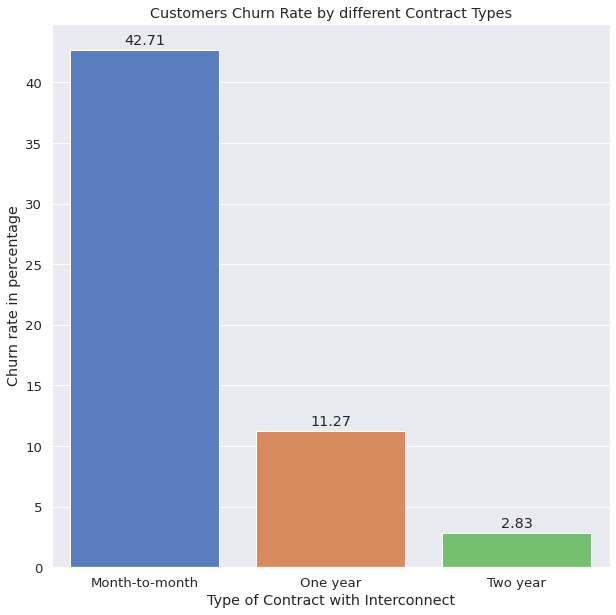

In [47]:
# Set bar plot style properties
sns.set(rc = {'figure.figsize':(10.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame
ax = sns.barplot(data=df_grp_by_contract_type, x='contract_type', y='churn_rate', palette='muted')
ax.set(title='Customers Churn Rate by different Contract Types',
       xlabel='Type of Contract with Interconnect', 
       ylabel='Churn rate in percentage')

# Show values on bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

Based on the above visualization, we can conclude:
1. **Churn Rates by Contract Type**: 
    - The churn rate for customers with month-to-month contracts is significantly high, with over `42%` of customers churning.
    - Customers with one-year contracts exhibit a notably lower churn rate at approximately `11%`, indicating higher retention compared to month-to-month contracts.
    - Customers with two-year contracts demonstrate the lowest churn rate, approximately `2.83%`, indicating significantly higher loyalty and retention compared to other contract types.  
    
 
2. **Contract Type and Churn Behavior**:   

   - Customers with longer contract commitments exhibit higher loyalty and are less likely to churn, whereas those with shorter-term contracts are more prone to churning.  
   

3. **Business Implications**:    

    - The analysis suggests that encouraging customers to opt for longer contract periods might improve overall retention rates.

## Service Adoption Rates

Service adoption rates refer to **the percentage of customers who have subscribed to or adopted specific additional services offered** by the company. Let's calulate the same:

In [48]:
# Count customers using each service
df_service_counts = df_merged[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']].apply(pd.Series.value_counts)
df_service_counts

,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
No,5024,4614,4621,4999,4336,4311
Yes,2019,2429,2422,2044,2707,2732


In [49]:
# Calculate adoption rates for each service
total_customers = len(df_merged)
df_adoption_rates = ((df_service_counts / total_customers) * 100).round(2)
df_adoption_rates = df_adoption_rates.transpose()
df_adoption_rates = df_adoption_rates[['Yes']].reset_index()
df_adoption_rates = df_adoption_rates.rename(columns={'index': 'services', 'Yes': 'service_adoption_rate'})
df_adoption_rates

,services,service_adoption_rate
0,online_security,28.67
1,online_backup,34.49
2,device_protection,34.39
3,tech_support,29.02
4,streaming_tv,38.44
5,streaming_movies,38.79


Great! Let's visualize the **Service Adoption Rates** by customers:

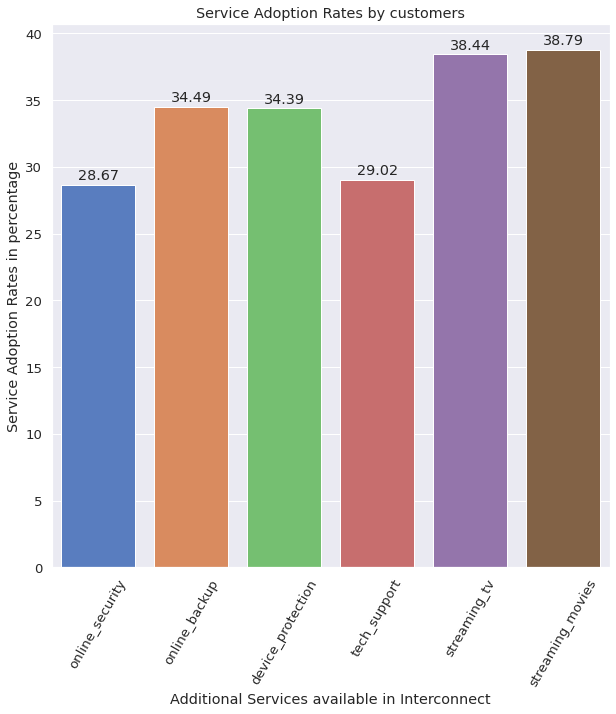

In [50]:
# Set bar plot style properties
sns.set(rc = {'figure.figsize':(10.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame
ax = sns.barplot(data=df_adoption_rates, x='services', y='service_adoption_rate', palette='muted')
ax.set(title='Service Adoption Rates by customers',
       xlabel='Additional Services available in Interconnect', 
       ylabel='Service Adoption Rates in percentage')

# Show values on bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation = 60)
plt.show()

Based on the above visualization, we can conclude:  
1. **Popular Services**: Streaming-related services seem to be more popular among customers, potentially indicating a preference for entertainment-related offerings.
2. **Opportunity for Improvement**: Services like Online Security and Tech Support may require attention or enhancement strategies to increase their adoption rates and potentially improve customer satisfaction or perceived value.

## Customer Demographics Distribution

To calculate and visualize **Customer Demographics Distribution**, we'll use the provided columns related to customer demographics - `gender`and `senior_citizen` to understand the distribution across these categories. Let's calculate counts for each demographic category:

In [51]:
# Calculate counts for each demographic category
gender_counts = df_merged['gender'].value_counts()
gender_counts

Male      3555
Female    3488
Name: gender, dtype: int64

In [52]:
# Calculate counts for each demographic category
senior_citizen_counts = df_merged['senior_citizen'].value_counts()
senior_citizen_counts

0    5901
1    1142
Name: senior_citizen, dtype: int64

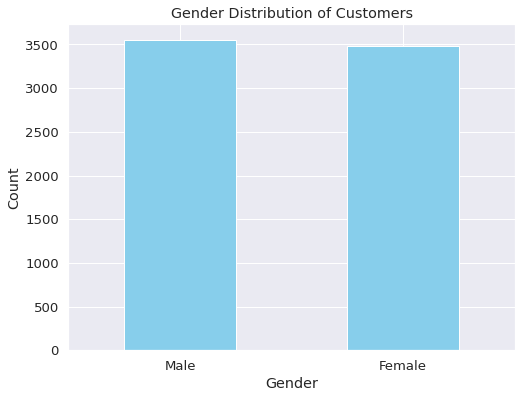

In [53]:
# Plot a Bar chart for gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

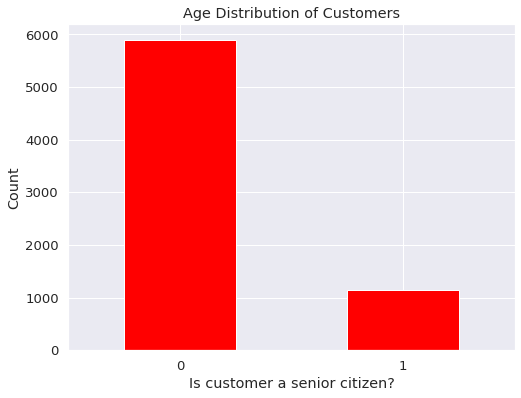

In [54]:
# Plot a Bar chart for senior citizen distribution
plt.figure(figsize=(8, 6))
senior_citizen_counts.plot(kind='bar', color='red')
plt.title('Age Distribution of Customers')
plt.xlabel('Is customer a senior citizen?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Based on the above visualizations, we can conclude:  
1. **The customer base is fairly balanced between male and female customers**. The difference in counts between male and female customers is not substantial, indicating a relatively equitable representation of genders within the customer base.
2. **The majority of customers are non-senior citizens**, indicating a lower representation of senior citizens within the customer base.

Strategies related to service offerings or customer support might need to consider the specific needs or preferences of senior citizens, considering their lower representation. This might involve tailoring services, communication, or providing support that caters more effectively to this demographic.

## Payment Method Preference

Let's plot a pie chart illustrating the distribution of payment methods used by customers.

In [55]:
# Calculate counts for each payment method
payment_method_counts = df_merged['payment_method'].value_counts()
payment_method_counts

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

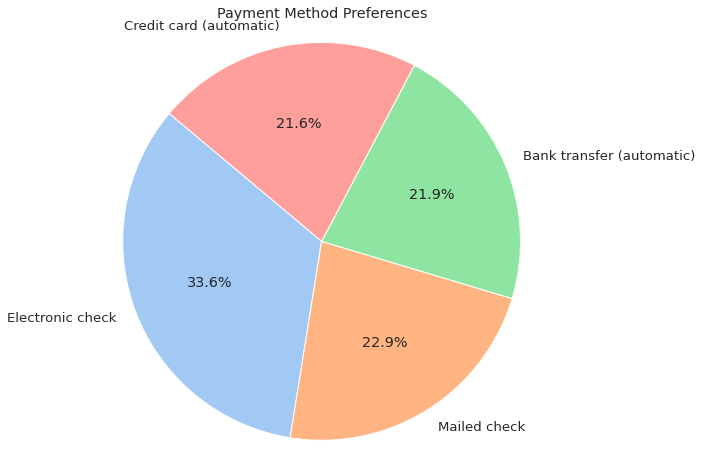

In [56]:
# Plot a pie chart for payment method preference
plt.figure(figsize=(8, 8))

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Payment Method Preferences')
plt.axis('equal')
plt.show()

Based on the above visualizations, we can conclude:

1. **Electronic Check appears to be the most commonly used payment method** among customers, with the highest count compared to other methods.
2. Mailed Check follows as the second most used payment method, but notably lower than electronic check.
3. Bank Transfer (Automatic) and Credit Card (Automatic) have fairly similar counts, indicating a similar level of usage.  
4. Electronic transactions (especially checks) might be more preferred due to their ease, considering their higher count compared to traditional mailed checks.
5. For payment-related service improvements or marketing strategies, **focusing on enhancing or promoting electronic payment methods might be beneficial, considering their higher adoption among customers**.

## Relationship between payment method and average monthly charges

Let's try to visualize the relationship between payment method and avergae monthly charges.

In [57]:
# Group by payment method and calculate average monthly charges
payment_charges = df_merged.groupby('payment_method')['monthly_charges'].mean().reset_index()
payment_charges

,payment_method,monthly_charges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


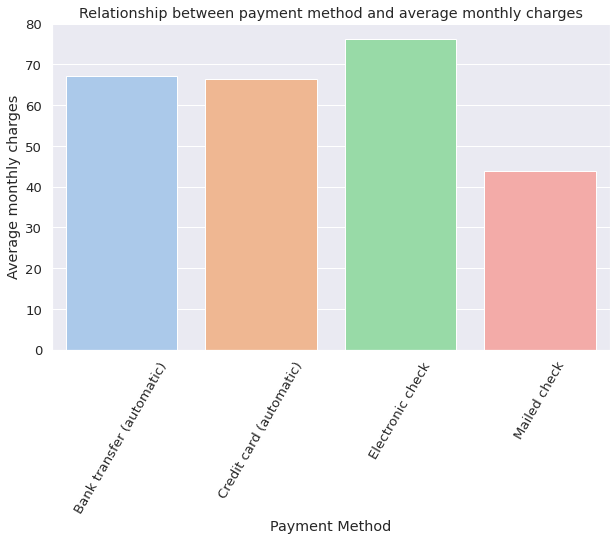

In [58]:
# Plot bar chart for relationship between payment method and monthly charges

# Set bar plot style properties
sns.set(rc = {'figure.figsize':(10.0, 6.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame
ax = sns.barplot(data=payment_charges, x='payment_method', y='monthly_charges', palette='pastel')
ax.set(title='Relationship between payment method and average monthly charges',
       xlabel='Payment Method', 
       ylabel='Average monthly charges')

plt.xticks(rotation = 60)
plt.show()

Based on the above visualizations, we can conclude:  
1. **Electronic check users, on average, incur significantly higher monthly charges** compared to customers using other payment methods.
2. **Mailed check users have notably lower average monthly charges** compared to electronic checks and other methods.
3. **Bank Transfer (Automatic) and Credit Card (Automatic) demonstrate similar average charges**, which are moderately lower than electronic check payments but notably higher than mailed checks.

## Churn Ratio Over Time

Churn ratio over time refers to the **measurement of customer churn (the rate at which customers leave a service) across different periods or intervals**, such as months, quarters, or years. It's an analysis that tracks the proportion or percentage of customers who stop using a service or product over a specific period.

Let's fisrt track the churn rate of customers who started their service within specific quarter:

In [59]:
# Calculate churn count and total customers within each quarter
churn_count = df_merged.groupby('begin_quarter')['has_churned'].sum()
churn_count

begin_quarter
1    323
2    356
3    550
4    640
Name: has_churned, dtype: int64

In [60]:
# Calculate total customers in each group
total_customers = df_merged.groupby('begin_quarter').size()
total_customers

begin_quarter
1    2017
2    1527
3    1673
4    1826
dtype: int64

In [61]:
# Compute churn ratio (%)
churn_ratio = ((churn_count / total_customers) * 100).round(2).reset_index()
churn_ratio = churn_ratio.rename(columns={0: 'churn_ratio_in_percentage'})
churn_ratio

,begin_quarter,churn_ratio_in_percentage
0,1,16.01
1,2,23.31
2,3,32.88
3,4,35.05


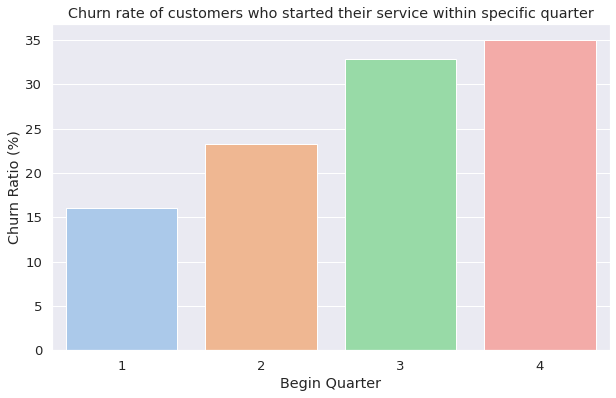

In [62]:
# Plot bar chart for churn rate of customers who started their service within specific quarter

# Set bar plot style properties
sns.set(rc = {'figure.figsize':(10.0, 6.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame
ax = sns.barplot(data=churn_ratio, x='begin_quarter', y='churn_ratio_in_percentage', palette='pastel')
ax.set(title='Churn rate of customers who started their service within specific quarter',
       xlabel='Begin Quarter', 
       ylabel='Churn Ratio (%)')

plt.show()

There is a visible **increase in churn rates as customers are grouped by the quarter they initiated service**. The churn rate appears lowest for those who started in the first quarter (16.01%) and gradually rises for those starting in subsequent quarters. The highest churn rate is observed for customers who began services in the fourth quarter (35.05%).

Let's now track the churn rate of customers who started their service within specific month:

In [63]:
# Calculate churn count and total customers within each month
churn_count = df_merged.groupby('begin_month')['has_churned'].sum()
churn_count

begin_month
1      94
2     122
3     107
4      98
5     126
6     132
7     142
8     151
9     257
10    212
11    224
12    204
Name: has_churned, dtype: int64

In [64]:
# Calculate total customers in each group
total_customers = df_merged.groupby('begin_month').size()
total_customers

begin_month
1     623
2     804
3     590
4     511
5     494
6     522
7     518
8     532
9     623
10    601
11    621
12    604
dtype: int64

In [65]:
# Compute churn ratio (%)
churn_ratio = ((churn_count / total_customers) * 100).round(2).reset_index()
churn_ratio = churn_ratio.rename(columns={0: 'churn_ratio_in_percentage'})
churn_ratio

,begin_month,churn_ratio_in_percentage
0,1,15.09
1,2,15.17
2,3,18.14
3,4,19.18
4,5,25.51
5,6,25.29
6,7,27.41
7,8,28.38
8,9,41.25
9,10,35.27


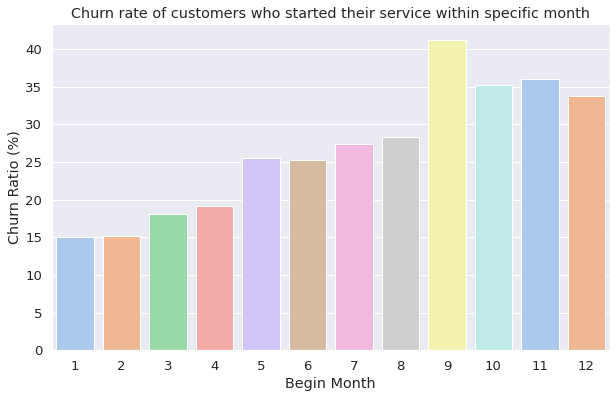

In [66]:
# Plot bar chart for churn rate of customers who started their service within specific month

# Set bar plot style properties
sns.set(rc = {'figure.figsize':(10.0, 6.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame
ax = sns.barplot(data=churn_ratio, x='begin_month', y='churn_ratio_in_percentage', palette='pastel')
ax.set(title='Churn rate of customers who started their service within specific month',
       xlabel='Begin Month', 
       ylabel='Churn Ratio (%)')

plt.show()

Based on the above visualizations, we can conclude that there seems to be a trend of higher churn rates during specific months. For instance, the churn rates are notably high in September, October, and November, peaking around 35% to 41%. This pattern suggests that **customers starting their service in these months are more likely to churn compared to other months**.

## Churn by Payment Method

Visualizing churn rate by payment method offers valuable insights into customer behavior regarding payment preferences and their likelihood to churn. This visualization helps **identify patterns or trends in churn behavior across different payment methods**. It allows businesses to understand if certain payment methods are associated with higher or lower churn rates, enabling them to make informed decisions on improving services, tailoring retention strategies, or adjusting offerings based on payment preferences to reduce churn and enhance customer loyalty. 

In [67]:
# Calculate churn rate by payment method
churn_by_payment = df_merged.groupby('payment_method')['has_churned'].agg(['count', 'sum'])
churn_by_payment = churn_by_payment.rename(columns={'count': 'total_customers', 'sum': 'no_of_customers_churned'})
churn_by_payment

,total_customers,no_of_customers_churned
payment_method,,
Bank transfer (automatic),1544,258
Credit card (automatic),1522,232
Electronic check,2365,1071
Mailed check,1612,308


In [68]:
churn_by_payment['churn_rate'] = ((churn_by_payment['no_of_customers_churned'] / churn_by_payment['total_customers']) * 100).round(2)
churn_by_payment = churn_by_payment.reset_index()
churn_by_payment

,payment_method,total_customers,no_of_customers_churned,churn_rate
0,Bank transfer (automatic),1544,258,16.71
1,Credit card (automatic),1522,232,15.24
2,Electronic check,2365,1071,45.29
3,Mailed check,1612,308,19.11


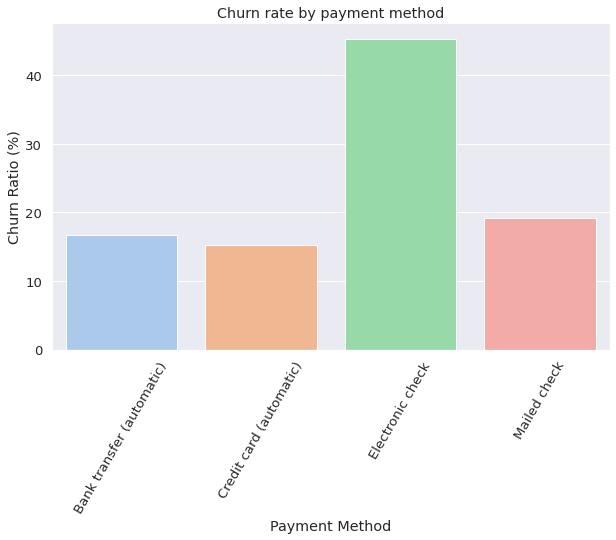

In [69]:
# Plot bar chart to visualize churn rate by payment method

# Set bar plot style properties
sns.set(rc = {'figure.figsize':(10.0, 6.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame
ax = sns.barplot(data=churn_by_payment, x='payment_method', y='churn_rate', palette='pastel')
ax.set(title='Churn rate by payment method',
       xlabel='Payment Method', 
       ylabel='Churn Ratio (%)')

plt.xticks(rotation = 60)
plt.show()

Based on the above visualization, we can conclude:
- Electronic check has a significantly higher churn rate (45.29%) compared to other payment methods. 
- Credit card (automatic) and Bank transfer (automatic) exhibit relatively lower churn rates (15.24% and 16.71% respectively), suggesting that customers using these payment methods are less likely to churn. 
- Mailed check has a moderate churn rate (19.11%), indicating it performs better than electronic checks but not as well as automatic bank transfers or credit card payments. 

## Churn based on adoption of additional services

Visualizing churn rates based on the adoption of additional services provides crucial insights into customer behavior and preferences. This visualization helps in understanding the relationship between service adoption and customer retention. 

In [70]:
# Group by 'no_of_services_subscribed' and calculate churn rate
churn_by_services = df_merged.groupby('no_of_services_subscribed')['has_churned'].agg(['count', 'sum'])
churn_by_services = churn_by_services.rename(columns={'count': 'total_customers', 'sum': 'no_of_customers_churned'})
churn_by_services

,total_customers,no_of_customers_churned
no_of_services_subscribed,,
0,2219,475
1,966,442
2,1033,370
3,1118,306
4,852,190
5,571,71
6,284,15


In [71]:
churn_by_services['churn_rate'] = ((churn_by_services['no_of_customers_churned'] / churn_by_services['total_customers']) * 100).round(2)
churn_by_services = churn_by_services.reset_index()
churn_by_services

,no_of_services_subscribed,total_customers,no_of_customers_churned,churn_rate
0,0,2219,475,21.41
1,1,966,442,45.76
2,2,1033,370,35.82
3,3,1118,306,27.37
4,4,852,190,22.30
5,5,571,71,12.43
6,6,284,15,5.28


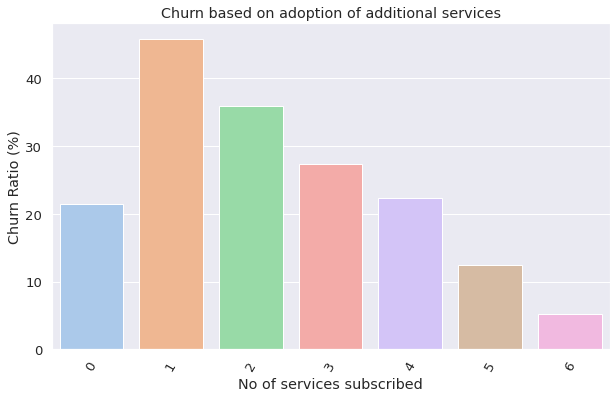

In [72]:
# Plot bar chart to visualize churn based on adoption of additional services

# Set bar plot style properties
sns.set(rc = {'figure.figsize':(10.0, 6.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame
ax = sns.barplot(data=churn_by_services, x='no_of_services_subscribed', y='churn_rate', palette='pastel')
ax.set(title='Churn based on adoption of additional services',
       xlabel='No of services subscribed', 
       ylabel='Churn Ratio (%)')

plt.xticks(rotation = 60)
plt.show()

There appears to be an inverse relationship between the number of services subscribed and the churn rate. As the number of additional services increases, the churn rate tends to decrease. Customers subscribing to more services tend to exhibit lower churn rates. **Customers with higher service adoption (5-6 services) exhibit significantly lower churn rates, indicating that these customers are more loyal and less likely to churn compared to those with fewer additional services.**

# 9. Data Preparation for Model Building <a id='data-preparation-for-model-building'></a> 
[Back to Contents](#contents)

## Remove columns not required for ML models

Let's look at our dataframe again and get a list of all the columns it has:

In [73]:
# Get the list of columns in our dataframe
df_merged.columns

Index(['customer_id', 'begin_date', 'begin_year', 'begin_month',
       'begin_quarter', 'end_date', 'end_date_modified', 'has_churned',
       'tenure_in_year', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'no_of_services_subscribed',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines'],
      dtype='object')

Great! Let's make a list of  all the columns that are not required by the ML Models:

In [74]:
# List of all the columns that are not required by the ML Models
columns_not_required = ['customer_id', 'begin_date', 'begin_year', 'begin_month', 'begin_quarter', 'end_date', 'end_date_modified']

In [75]:
# Drop columns not required for ML models from the DataFrame
df_merged = df_merged.drop(columns_not_required, axis=1)
df_merged.columns

Index(['has_churned', 'tenure_in_year', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'no_of_services_subscribed', 'gender', 'senior_citizen', 'partner',
       'dependents', 'multiple_lines'],
      dtype='object')

Great! So now we have 20 columns in our DataFrames to be used by the models.

## Transform categorical features into numerical features 

Let's get a quick general information of our dataframe - `df_merged` once again:

In [76]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                7043 non-null   int64  
 1   tenure_in_year             7043 non-null   int64  
 2   type                       7043 non-null   object 
 3   paperless_billing          7043 non-null   object 
 4   payment_method             7043 non-null   object 
 5   monthly_charges            7043 non-null   float64
 6   total_charges              7043 non-null   float64
 7   internet_service           7043 non-null   object 
 8   online_security            7043 non-null   object 
 9   online_backup              7043 non-null   object 
 10  device_protection          7043 non-null   object 
 11  tech_support               7043 non-null   object 
 12  streaming_tv               7043 non-null   object 
 13  streaming_movies           7043 non-null   objec

### One-Hot Encoding for Logistic Regression

Let's have a peak into the dataframe - `df_merged`:

In [77]:
# Get random 10 records from the dataframe
df_merged.sample(n=10, random_state=234578)

,has_churned,tenure_in_year,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,no_of_services_subscribed,gender,senior_citizen,partner,dependents,multiple_lines
842,1,1,One year,No,Bank transfer (automatic),19.80,229.60,No,No,No,No,No,No,No,0,Female,0,Yes,Yes,No
2180,0,6,Two year,Yes,Credit card (automatic),95.50,6707.15,Fiber optic,No,Yes,Yes,Yes,No,Yes,4,Male,1,Yes,No,No
903,0,5,One year,Yes,Credit card (automatic),105.60,6068.65,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,5,Female,0,Yes,No,No
3015,0,5,Two year,Yes,Electronic check,86.75,5186.00,DSL,Yes,Yes,Yes,Yes,Yes,Yes,6,Male,0,Yes,Yes,No
4923,0,5,Month-to-month,Yes,Bank transfer (automatic),49.75,2535.55,DSL,Yes,No,No,No,No,No,1,Female,0,No,No,No
3977,0,6,Two year,Yes,Credit card (automatic),110.10,6705.70,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,6,Male,0,Yes,No,No
4182,1,3,Month-to-month,No,Electronic check,98.65,2862.75,Fiber optic,No,No,No,Yes,Yes,Yes,3,Female,1,No,No,Yes
3168,0,5,One year,Yes,Mailed check,19.35,1033.00,No,No,No,No,No,No,No,0,Female,0,No,No,No
530,0,2,Two year,Yes,Credit card (automatic),21.10,490.65,No,No,No,No,No,No,No,0,Female,0,Yes,Yes,No
3350,1,0,Month-to-month,Yes,Mailed check,44.15,44.15,DSL,No,No,No,No,No,No,0,Male,0,No,No,No


**Logistic Regression determines the target using a formula consisting of numerical features**. But, as we can see above that we have few columns as string. Let's convert these categorical features or columns to numerical ones by ensuring that we don't fall into dummy trap:

In [78]:
# One-Hot Encoding without dummy trap
df_merged_ohe = pd.get_dummies(df_merged, drop_first=True)

# Get random 10 records from the dataframe
df_merged_ohe.sample(n=10, random_state=234578)

,has_churned,tenure_in_year,monthly_charges,total_charges,no_of_services_subscribed,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),...,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes
842,1,1,19.80,229.60,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2180,0,6,95.50,6707.15,4,1,0,1,1,1,...,0,1,1,1,0,1,1,1,0,0
903,0,5,105.60,6068.65,5,0,1,0,1,1,...,1,1,1,0,1,1,0,1,0,0
3015,0,5,86.75,5186.00,6,0,0,1,1,0,...,1,1,1,1,1,1,1,1,1,0
4923,0,5,49.75,2535.55,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3977,0,6,110.10,6705.70,6,0,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
4182,1,3,98.65,2862.75,3,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
3168,0,5,19.35,1033.00,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
530,0,2,21.10,490.65,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,1,0
3350,1,0,44.15,44.15,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Great! We have One-Hot Encoded data into `df_merged_ohe` dataframe now that we can use it for Logistic Regression.

### Label Encoding for Tree-based ML Algorithms 

For Tree-based ML Algorithms, One-Hot Encoded data is not the best. The primary reason is that unlike regression models that have access to the whole spectrum of features at once, the tree-based model can process only one feature at a time. The best approach for trees is making splits by raw categoricals but since `sklearn` doesn't support it yet, the second best approach is **Label Encoding**.

In [79]:
encoder = OrdinalEncoder()
df_merged_ordinal = pd.DataFrame(encoder.fit_transform(df_merged), columns=df_merged.columns)
df_merged_ordinal.sample(n=10, random_state=234578)

,has_churned,tenure_in_year,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,no_of_services_subscribed,gender,senior_citizen,partner,dependents,multiple_lines
842,1.0,1.0,1.0,0.0,0.0,25.0,940.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2180,0.0,6.0,2.0,1.0,1.0,1198.0,6106.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0
903,0.0,5.0,1.0,1.0,1.0,1387.0,5869.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0
3015,0.0,5.0,2.0,1.0,2.0,1030.0,5476.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0
4923,0.0,5.0,0.0,1.0,0.0,371.0,4075.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3977,0.0,6.0,2.0,1.0,1.0,1471.0,6105.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,1.0,0.0,0.0
4182,1.0,3.0,0.0,0.0,2.0,1255.0,4269.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0
3168,0.0,5.0,1.0,1.0,3.0,16.0,2520.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,0.0,2.0,2.0,1.0,1.0,51.0,1587.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3350,1.0,0.0,0.0,1.0,3.0,288.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Divide encoded dataset into target and features 

Splitting the dataset into target and features is a fundamental step in preparing the data for building predictive models. It involves separating the input data (**features**) from the output data (**target**) that we want the model to predict. In supervised learning, where the model is trained on labeled data, the target variable is typically provided in the dataset. The model learns from the relationship between the features and the target during training and uses that knowledge to make predictions or classifications on new data.  

### One-Hot Encoded Dataset - `df_merged_ohe`

In [80]:
ohe_target = df_merged_ohe['has_churned']
ohe_target.head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: has_churned, dtype: int64

In [81]:
ohe_features = df_merged_ohe.drop('has_churned', axis=1)
ohe_features.head()

,tenure_in_year,monthly_charges,total_charges,no_of_services_subscribed,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,...,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes
0,0,29.85,29.85,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,3,56.95,1889.50,2,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,0,53.85,108.15,2,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
3,4,42.30,1840.75,3,0,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
4,0,70.70,151.65,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Label Encoded Dataset - `df_merged_ordinal`

In [82]:
ordinal_target = df_merged_ordinal['has_churned']
ordinal_target.head(10)

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
7    0.0
8    1.0
9    0.0
Name: has_churned, dtype: float64

In [83]:
ordinal_features = df_merged_ordinal.drop('has_churned', axis=1)
ordinal_features.head()

,tenure_in_year,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,no_of_services_subscribed,gender,senior_citizen,partner,dependents,multiple_lines
0,0.0,0.0,1.0,2.0,142.0,75.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,1.0,0.0,3.0,498.0,3625.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,3.0,436.0,537.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
3,4.0,1.0,0.0,0.0,266.0,3571.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,2.0,729.0,675.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Divide target and features into train, validation & test set

Awesome! In machine learning, it is common practice to split the available data into three separate sets: the **training set**, the **validation set**, and the **test set**. Each set serves a specific purpose in the model development and evaluation process. Here's a breakdown of each set:  

1. **Training Set**:  
The training set is the largest portion of the dataset used to train the machine learning model. It contains input features and their corresponding target values. The model learns patterns and relationships between the features and the target by optimizing its parameters or weights based on this training data. The training set is crucial for the model to capture the underlying patterns in the data and generalize well to unseen instances.

2. **Validation Set**:
The validation set is used during the model development process to tune hyperparameters and evaluate the model's performance. The validation set helps to assess the generalization ability of the model and avoid overfitting (when the model performs well on the training data but poorly on new data). It provides an unbiased estimate of the model's performance and helps in making decisions on model improvements or hyperparameter adjustments.

3. **Test Set**:
The test set is a separate portion of the dataset that is used to evaluate the final performance of the trained model. It serves as an unbiased evaluation of the model's ability to generalize to new, unseen data. The test set should be representative of the real-world data that the model is expected to perform on. It should not be used during model development or hyperparameter tuning to ensure an unbiased assessment.  

**It is important to note that the data should be split randomly and in a stratified manner if the dataset is imbalanced, ensuring that the distribution of target classes is maintained across the different sets**. We will look into the imbalance issues in a while.

In short, the training set is used to train the model, the validation set is used to tune hyperparameters and evaluate model performance, and the test set is used for the final unbiased evaluation of the trained model's performance.  

Now, we need to split the source data i.e. `features` and `target` into a training set (`features_train`, `target_train`), a validation set (`features_valid`, `target_valid`), and a test set (`features_test`, `target_test`). In order to split the data we will use `train_test_split` method from `sklearn.model_selection` module. And to make sure that the data split is random, we should use `random_state` paramter.  

But the question is what should be the proportion of split for each category? The proportion of data split for each category (training set, validation set, and test set) is a matter of choice and can depend on various factors such as the size of the dataset, the complexity of the problem, and the availability of data. The common rule is to split data in `3:1:1` proportion:

In [84]:
# Decide on a value for random state
rand_state = 5678989

### One-Hot Encoded Dataset - `ohe_target` & `ohe_features`

In [85]:
# Split the source dataset - ohe_features and ohe_target into two parts - 60% and 40%
# 60% split set will become the training dataset
# 40% split set will be used to get the validation set and test set
ohe_features_train, ohe_features_remaining, ohe_target_train, ohe_target_remaining = train_test_split(ohe_features, ohe_target, test_size=0.4, random_state=rand_state)

In [86]:
# Get the total number of observations in ohe_features_train
ohe_features_train.shape

(4225, 23)

In [87]:
# Get the total number of observations in ohe_target_train
ohe_target_train.shape

(4225,)

In [88]:
# Split the remaining dataset - ohe_features_remaining and ohe_target_remaining into two equal parts
# The first split set will become the validation dataset
# The second split set will become the test dataset
ohe_features_valid, ohe_features_test, ohe_target_valid, ohe_target_test = train_test_split(ohe_features_remaining, ohe_target_remaining, test_size=0.5, random_state=rand_state)

In [89]:
# Get the total number of observations in ohe_features_valid
ohe_features_valid.shape

(1409, 23)

In [90]:
# Get the total number of observations in ohe_target_valid
ohe_target_valid.shape

(1409,)

In [91]:
# Get the total number of observations in ohe_features_test
ohe_features_test.shape

(1409, 23)

In [92]:
# Get the total number of observations in ohe_target_test
ohe_target_test.shape

(1409,)

Great! Now, we have our One-Hot Encoded `features` and `target` divided into train, validation and test datasets.

### Label Encoded Dataset - `ordinal_target` & `ordinal_features`

Now, let's do the same for the Label Encoded `feature` and `target`:

In [93]:
# Split the source dataset - ordinal_features and ordinal_target into two parts - 60% and 40%
# 60% split set will become the training dataset
# 40% split set will be used to get the validation set and test set
ordinal_features_train, ordinal_features_remaining, ordinal_target_train, ordinal_target_remaining = train_test_split(ordinal_features, ordinal_target, test_size=0.4, random_state=rand_state)

In [94]:
# Get the total number of observations in ordinal_features_train
ordinal_features_train.shape

(4225, 19)

In [95]:
# Get the total number of observations in ordinal_target_train
ordinal_target_train.shape

(4225,)

In [96]:
# Split the remaining dataset - ordinal_features_remaining and ordinal_target_remaining into two equal parts
# The first split set will become the validation dataset
# The second split set will become the test dataset
ordinal_features_valid, ordinal_features_test, ordinal_target_valid, ordinal_target_test = train_test_split(ordinal_features_remaining, ordinal_target_remaining, test_size=0.5, random_state=rand_state)

In [97]:
# Get the total number of observations in ordinal_features_valid
ordinal_features_valid.shape

(1409, 19)

In [98]:
# Get the total number of observations in ordinal_target_valid
ordinal_target_valid.shape

(1409,)

In [99]:
# Get the total number of observations in ordinal_features_test
ordinal_features_test.shape

(1409, 19)

In [100]:
# Get the total number of observations in ordinal_target_test
ordinal_target_test.shape

(1409,)

Great! Now, we have our Label Encoded `features` and `target` divided into train, validation and test datasets.

## Feature scaling of train, validation & test set

Feature scaling is an important preprocessing step in machine learning. Scaling the features ensures that all input variables are on a similar scale, preventing some features from dominating others in the model training process. When dealing with numerical features with different ranges or units, feature scaling becomes necessary to achieve better model performance and convergence.  

The `StandardScaler` from the `sklearn.preprocessing` module in `scikit-learn` is a feature scaling technique used to standardize numerical features. Standardization transforms the features so that they have a mean of 0 and a standard deviation of 1. This process is essential for algorithms that rely on distance-based calculations or gradient-based optimization, as it ensures that all features are on a similar scale.

**Key points about `StandardScaler`**:

1. **Fit and Transform**: The `StandardScaler` is an instance of a transformer in `scikit-learn`. It follows the same fit and transform paradigm as other preprocessing techniques. First, it is fitted to the training data using the `fit()` method to compute the mean and standard deviation of each feature. Then, the `transform()` method is used to transform the training data and any subsequent data using the computed mean and standard deviation.

2. **Standardized Features**: After applying the `StandardScaler`, each feature in the dataset will have a mean of 0 and a standard deviation of 1.

3. **No Impact on Categorical Features**: The `StandardScaler` should only be used for numerical features. It does not affect categorical features or features that have a constant value across all samples.

In [101]:
# Get all the numeric columns
numeric_cols = ['tenure_in_year', 'monthly_charges', 'total_charges', 'no_of_services_subscribed', 'senior_citizen']

In [102]:
scaler = StandardScaler()

### One-Hot Encoded Dataset

In [103]:
scaler.fit(ohe_features_train[numeric_cols])

StandardScaler()

In [104]:
# Scaling the features
pd.options.mode.chained_assignment = None
ohe_features_train[numeric_cols] = scaler.transform(ohe_features_train[numeric_cols])
ohe_features_valid[numeric_cols] = scaler.transform(ohe_features_valid[numeric_cols])
ohe_features_test[numeric_cols] = scaler.transform(ohe_features_test[numeric_cols])

In [105]:
ohe_features_train[numeric_cols].head()

,tenure_in_year,monthly_charges,total_charges,no_of_services_subscribed,senior_citizen
170,0.516478,0.643846,0.556590,0.530078,-0.439123
3309,-0.439543,-1.480738,-0.774663,-1.090848,-0.439123
750,0.038467,-0.265747,-0.277192,-0.010231,-0.439123
5122,0.038467,-0.491907,-0.417224,-0.550539,-0.439123
6847,-0.439543,-0.290509,-0.529209,-0.550539,-0.439123


### Label Encoded Dataset

In [106]:
scaler.fit(ordinal_features_train[numeric_cols])

StandardScaler()

In [107]:
# Scaling the features
pd.options.mode.chained_assignment = None
ordinal_features_train[numeric_cols] = scaler.transform(ordinal_features_train[numeric_cols])
ordinal_features_valid[numeric_cols] = scaler.transform(ordinal_features_valid[numeric_cols])
ordinal_features_test[numeric_cols] = scaler.transform(ordinal_features_test[numeric_cols])

In [108]:
ordinal_features_test[numeric_cols].head()

,tenure_in_year,monthly_charges,total_charges,no_of_services_subscribed,senior_citizen
3743,-0.917554,-0.667439,-1.140475,-0.550539,-0.439123
6910,1.472498,1.774025,1.716807,2.151003,-0.439123
3864,-0.439543,1.248331,0.638675,0.530078,-0.439123
3917,-1.395564,0.026560,-1.458697,-1.090848,2.277267
6566,1.472498,1.834283,1.742637,2.151003,-0.439123


## Fix the class imbalance 

In [109]:
# Print out the lengths of the negative and positive outcomes for training btarget
print(len(ordinal_target_train[ordinal_target_train == 0]))
print(len(ordinal_target_train[ordinal_target_train == 1]))

3096
1129


### Upsampling to fix class imbalance

**Upsampling** is a technique used to address class imbalance in a dataset, particularly in the context of binary classification problems where one class (the minority class) is significantly underrepresented compared to the other class (the majority class). Class imbalance can lead to biased machine learning models that may have poor performance in predicting the minority class.  

**In upsampling, we artificially increase the number of instances of the minority class to balance the class distribution**. This is typically done by creating duplicate or synthetic samples from the existing instances of the minority class. The objective is to create a new balanced dataset that has an equal number of samples for each class.    

Upsampling is performed in several steps:
1. Split the training sample into negative and positive observations;
2. Duplicate the positive observations several times;
3. Create a new training sample based on the data obtained;
4. Shuffle the data: identical questions following one another will not help the training.

In [110]:
# Function to upsample the training set
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [111]:
# Upsampling for label encoded training set
ordinal_features_upsampled, ordinal_target_upsampled = upsample(ordinal_features_train, ordinal_target_train, 3)

# Print out the lengths of the negative and positive outcomes for upsampled training target
print(len(ordinal_target_upsampled[ordinal_target_upsampled == 0]))
print(len(ordinal_target_upsampled[ordinal_target_upsampled == 1]))

3096
3387


In [112]:
# Upsampling for one-hot encoding training set
ohe_features_upsampled, ohe_target_upsampled = upsample(ohe_features_train, ohe_target_train, 3)

# Print out the lengths of the negative and positive outcomes for upsampled training target
print(len(ohe_target_upsampled[ohe_target_upsampled == 0]))
print(len(ohe_target_upsampled[ohe_target_upsampled == 1]))

3096
3387


# 10. Model Evaluation Procedure <a id='model-evaluation-procedure'></a> 
[Back to Contents](#contents)

Composing an evaluation routine which can be used for all models in this project

In [113]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

# 11. Model Building <a id='model-building'></a> 
[Back to Contents](#contents)

Our goal is to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model. For this reason, `GridSearch` were introduced. 

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. In `GridSearchCV`, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

References:
- [Tune Hyperparameters with GridSearchCV](https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/)
- [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

## Logistic Regression Model

Let's first train and predict using **Logistic Regression Model**:

In [114]:
%%time
## Train logistic regression model

# Instantiate the model
logistic_reg_model = LogisticRegression(solver='liblinear', random_state=7654321)

# Train the model on the training set
logistic_reg_model.fit(ohe_features_train, ohe_target_train)

# CPU times: user 18.9 ms, sys: 7.99 ms, total: 26.9 ms
# Wall time: 25.7 ms

CPU times: user 18.9 ms, sys: 7.99 ms, total: 26.9 ms
Wall time: 25.7 ms


LogisticRegression(random_state=7654321, solver='liblinear')

          train  test
Accuracy   0.85  0.84
F1         0.70  0.68
APS        0.80  0.79
ROC AUC    0.90  0.89


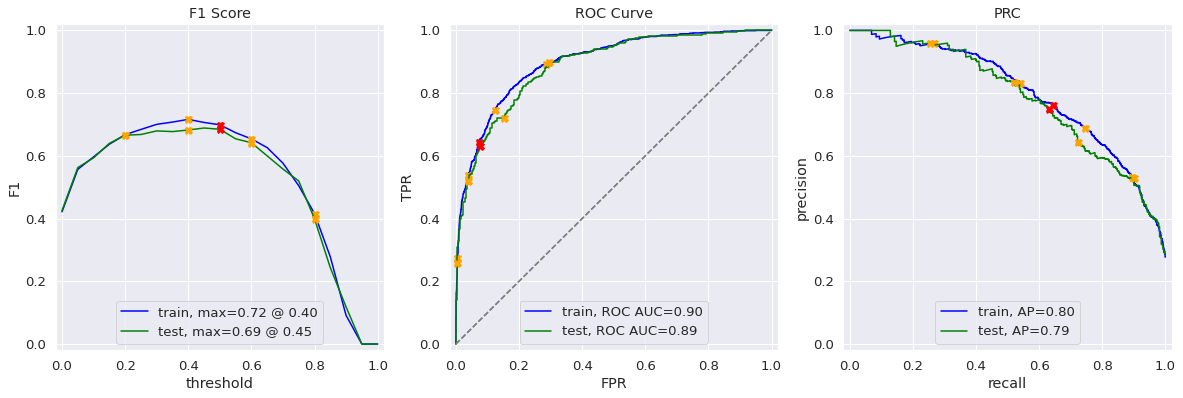

In [115]:
# Evaluate the model using the function - evaluate_model
evaluate_model(logistic_reg_model, ohe_features_train, ohe_target_train, ohe_features_valid, ohe_target_valid)

From the trained **Logistic Regression** model's performance metrics above on the training and validation sets, several conclusions can be drawn:

1. **Accuracy**: The model exhibits consistent performance between the training and validation sets, achieving around 85% accuracy on the training set and maintaining a slightly lower but comparable accuracy of 84% on the validation set.

2. **F1 Score**: The F1 score, which combines precision and recall, stands at approximately 0.70 on the training set and 0.68 on the validation set. It indicates a decent balance between precision and recall.

3. **Average Precision Score (APS)**: The model demonstrates an APS of around 0.80 on the training set and 0.79 on the validation set. APS focuses on the trade-off between true positives and false positives, showcasing good performance.

4. **ROC AUC**: The ROC AUC score measures the model's ability to distinguish between classes, with values close to 1 indicating better performance. The model has a strong ROC AUC score, around 0.90 on the training set and slightly lower at 0.89 on the validation set, showcasing consistent discriminative power on both datasets.

Overall, **the model displays reasonably good performance across multiple evaluation metrics on both the training and validation sets**, indicating its capacity to generalize well to new, unseen data with a high degree of accuracy and reliability.

## Decision Tree Classifier Model

Let's now train and predict using **Decision Tree Classifier Model**:

In [116]:
%%time

# Define hyperparameters to tune
grid = {
    "max_depth" : list(range(1, 10)),
}

# Instantiate a Decision Tree Classifier model
decision_tree_classifier_model = DecisionTreeClassifier(random_state=rand_state)

# Define the grid search cv
grid_search_cv_dtc = GridSearchCV(estimator=decision_tree_classifier_model, param_grid=grid, scoring="roc_auc", cv=3)

# Execute search
grid_search_cv_dtc.fit(ordinal_features_train, ordinal_target_train)

# Print result
print('The best hyperparameters are: ', grid_search_cv_dtc.best_params_)

# The best hyperparameters are:  {'max_depth': 6}
# CPU times: user 446 ms, sys: 0 ns, total: 446 ms
# Wall time: 451 ms

The best hyperparameters are:  {'max_depth': 6}
CPU times: user 446 ms, sys: 0 ns, total: 446 ms
Wall time: 451 ms


Now, we've got the best hyperparameters for Decision Tree Classifier model. We'll use that and train, predict and evaluate our model:

In [117]:
%%time

# Instantiate a Decision Tree Classifier model
decision_tree_classifier_model = DecisionTreeClassifier(**grid_search_cv_dtc.best_params_)

# Train the model using training features and target
decision_tree_classifier_model.fit(ordinal_features_train, ordinal_target_train)

# CPU times: user 17.7 ms, sys: 2.05 ms, total: 19.7 ms
# Wall time: 18.2 ms
# DecisionTreeClassifier(max_depth=6)

CPU times: user 17.7 ms, sys: 2.05 ms, total: 19.7 ms
Wall time: 18.2 ms


DecisionTreeClassifier(max_depth=6)

          train  test
Accuracy   0.85  0.83
F1         0.65  0.62
APS        0.79  0.74
ROC AUC    0.90  0.87


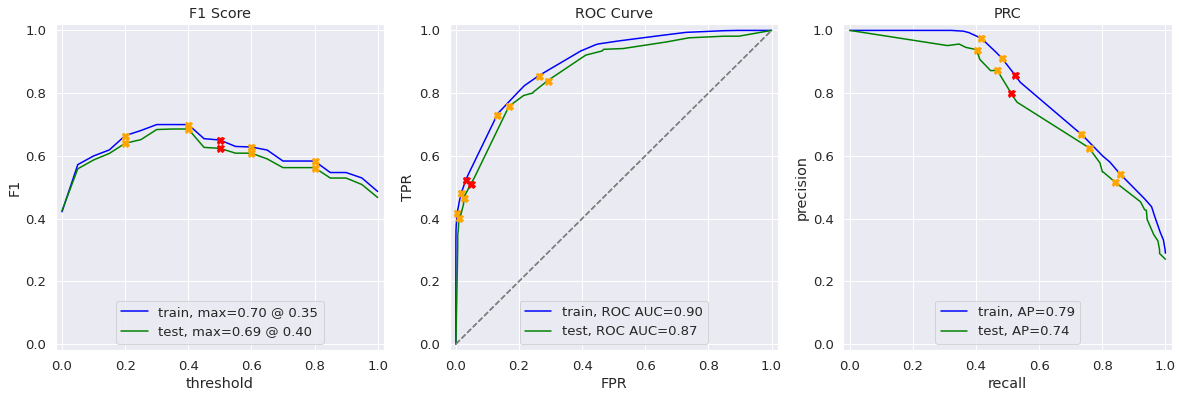

In [118]:
# Evaluate the model using the function - evaluate_model
evaluate_model(decision_tree_classifier_model, ordinal_features_train, ordinal_target_train, ordinal_features_valid, ordinal_target_valid)

The performance metrics of the **Decision Tree Classifier** model on the training and validation sets above provides the following insights into its behavior:

1. **Accuracy**: The model achieved approximately 85% accuracy on the training set and slightly lower accuracy of 83% on the validation set. This indicates _a moderate level of overfitting as the model's performance decreased slightly on unseen data_.

2. **F1 Score**: The F1 score, which balances precision and recall, is around 0.65 on the training set and 0.62 on the validation set. This demonstrates a decent but slightly reduced ability to correctly classify the positive class in the validation data.

3. **Average Precision Score (APS)**: The model showcases an APS of roughly 0.79 on the training set and 0.74 on the validation set.

4. **ROC AUC**: The ROC AUC score measures the model's ability to differentiate between classes, with values closer to 1 indicating better discrimination. The model demonstrates a strong ROC AUC score, around 0.90 on the training set and slightly lower at 0.87 on the validation set, indicating consistent discriminative power, though slightly reduced in unseen data.

In conclusion, **the Decision Tree Classifier model performs reasonably well on both the training and validation sets, but it exhibits some degree of overfitting**, as evidenced by the drop in performance metrics on the validation set compared to the training set.

## Random Forest Classifier Model

Let's now train and predict using **Random Forest Classifier Model**:

In [119]:
%%time

# Define hyperparameters to tune
grid = {
    "n_estimators" : list(range(30, 51, 10)),
    "max_depth" : list(range(2, 8)),
}

# Instantiate a Random Forest Classifier model
rfc_model = RandomForestClassifier(random_state=rand_state)

# Define the grid search cv
grid_search_cv_rfc = GridSearchCV(estimator=rfc_model, param_grid=grid, scoring="roc_auc", cv=3)

# Execute search
grid_search_cv_rfc.fit(ordinal_features_train, ordinal_target_train)

# Print result
print('The best hyperparameters are: ', grid_search_cv_rfc.best_params_)

# The best hyperparameters are:  {'max_depth': 7, 'n_estimators': 30}
# CPU times: user 7.54 s, sys: 39.5 ms, total: 7.58 s
# Wall time: 7.6 s

The best hyperparameters are:  {'max_depth': 7, 'n_estimators': 30}
CPU times: user 7.54 s, sys: 39.5 ms, total: 7.58 s
Wall time: 7.6 s


Now, we've got the best hyperparameters for Random Forest Classifier model. We'll use that and train, predict and evaluate our model:

In [120]:
%%time

# Instantiate a Random Forest Classifier model
rfc_model = RandomForestClassifier(**grid_search_cv_rfc.best_params_)

# Train the model using training features and target
rfc_model.fit(ordinal_features_train, ordinal_target_train)

# CPU times: user 141 ms, sys: 8.03 ms, total: 149 ms
# Wall time: 160 ms
# RandomForestClassifier(max_depth=7, n_estimators=30)

CPU times: user 141 ms, sys: 8.03 ms, total: 149 ms
Wall time: 160 ms


RandomForestClassifier(max_depth=7, n_estimators=30)

          train  test
Accuracy   0.86  0.84
F1         0.67  0.63
APS        0.83  0.77
ROC AUC    0.92  0.88


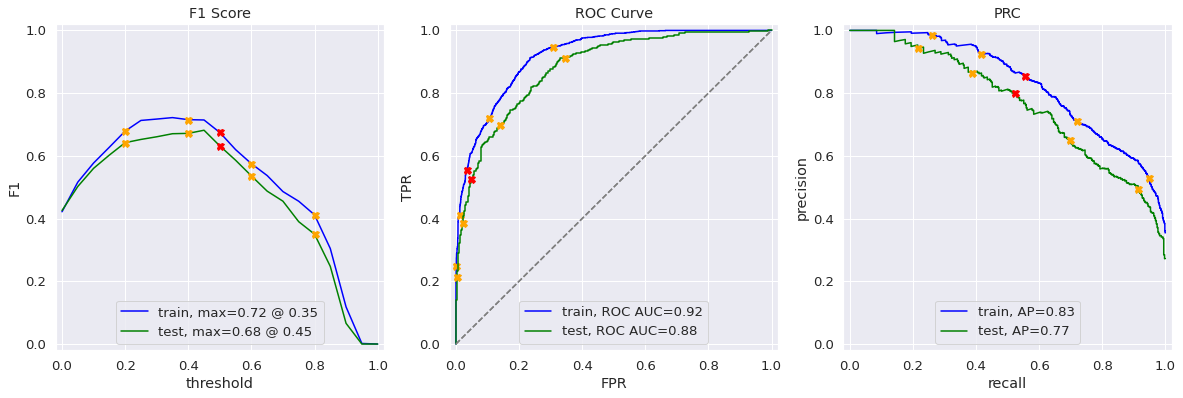

In [121]:
# Evaluate the model using the function - evaluate_model
evaluate_model(rfc_model, ordinal_features_train, ordinal_target_train, ordinal_features_valid, ordinal_target_valid)

The performance metrics of the **Random Forest Classifier** model on the training and validation sets above provides the following insights into its behavior:

1. **Accuracy**: The model achieved approximately 86% accuracy on the training set and slightly lower accuracy of 84% on the validation set. This indicates a moderate level of overfitting.

2. **F1 Score**: The F1 score, which balances precision and recall, is around 0.67 on the training set and 0.63 on the validation set. It demonstrates decent but slightly reduced ability to correctly classify the positive class in the validation data.

3. **Average Precision Score (APS)**: The model showcases an APS of roughly 0.83 on the training set and 0.77 on the validation set. There's a drop in performance on unseen data, but the model still maintains a reasonably good average precision.

4. **ROC AUC**: The ROC AUC score measures the model's ability to differentiate between classes, with values closer to 1 indicating better discrimination. The model demonstrates a strong ROC AUC score, around 0.92 on the training set and slightly lower at 0.88 on the validation set, indicating good discriminative power, though slightly reduced in unseen data.

In conclusion, the **Random Forest Classifier model performs well on both the training and validation sets**. It shows slightly lower performance on the validation set compared to the training set, suggesting some overfitting, but it maintains good accuracy.

## LGBMClassifier Model

Let's now train and predict using **LGBMClassifier Model**:

In [122]:
%%time

# Define hyperparameters to tune
grid_lgbm = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': list(range(30, 101, 10)),
}

# Instantiate a LGBMClassifier model
lgbm_model = LGBMClassifier(random_state=rand_state)

# Define the grid search cv
grid_search_cv_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=grid_lgbm, scoring="roc_auc", cv=3)

# Execute search
grid_search_cv_lgbm.fit(ordinal_features_train, ordinal_target_train)

# Print result
print('The best hyperparameters are: ', grid_search_cv_lgbm.best_params_)

# The best hyperparameters are:  {'learning_rate': 0.05, 'n_estimators': 100}
# CPU times: user 3min 36s, sys: 1.68 s, total: 3min 38s
# Wall time: 3min 39s

The best hyperparameters are:  {'learning_rate': 0.05, 'n_estimators': 100}
CPU times: user 3min 36s, sys: 1.68 s, total: 3min 38s
Wall time: 3min 39s


Now, we've got the best hyperparameters for LightGBM Classifier model . We'll use that and train, predict and evaluate our model:

In [123]:
%%time

# Instantiate a LGBMClassifier model
lgbm_model = LGBMClassifier(**grid_search_cv_lgbm.best_params_)

# Train the model using training features and target
lgbm_model.fit(ordinal_features_train, ordinal_target_train)

# CPU times: user 6.99 s, sys: 105 ms, total: 7.1 s
# Wall time: 7.11 s
# LGBMClassifier(learning_rate=0.05)

CPU times: user 6.99 s, sys: 105 ms, total: 7.1 s
Wall time: 7.11 s


LGBMClassifier(learning_rate=0.05)

          train  test
Accuracy   0.91  0.87
F1         0.81  0.72
APS        0.93  0.84
ROC AUC    0.97  0.91


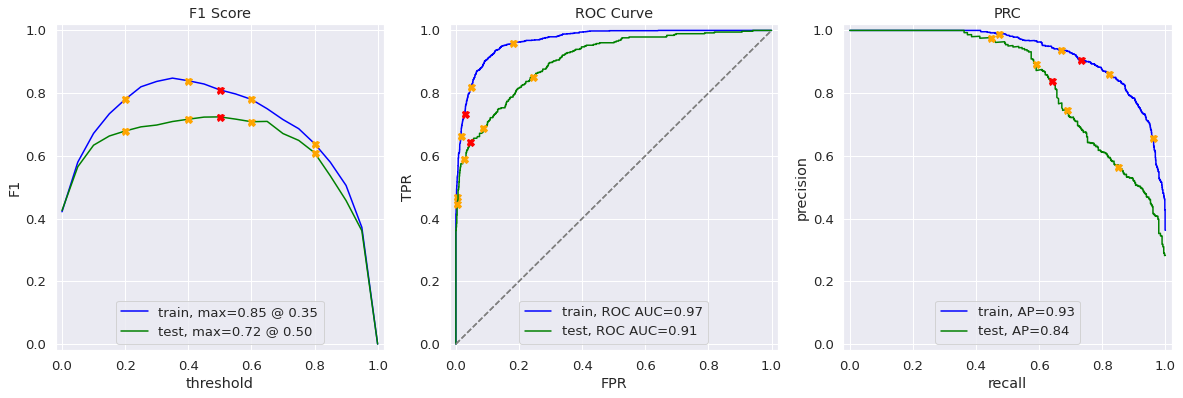

In [124]:
# Evaluate the model using the function - evaluate_model
evaluate_model(lgbm_model, ordinal_features_train, ordinal_target_train, ordinal_features_valid, ordinal_target_valid)

The performance metrics of the **LGBMClassifier model** on the training and validation sets indicates following behaviors:

1. **Accuracy**: The model achieved high accuracy, approximately 91% on the training set and 87% on the validation set. This suggests good generalization to unseen data with a minor drop in accuracy.

2. **F1 Score**: The F1 score, which balances precision and recall, is around 0.81 on the training set and 0.72 on the validation set. Although there's a decrease in performance on the validation data, the model still maintains a decent ability to correctly classify the positive class.

3. **Average Precision Score (APS)**: The model showcases an APS of roughly 0.93 on the training set and 0.84 on the validation set. While there's a decrease in performance on unseen data, the model still maintains a reasonably good average precision.

4. **ROC AUC**: The ROC AUC score measures the model's ability to differentiate between classes, with values closer to 1 indicating better discrimination. The model demonstrates a strong ROC AUC score, around 0.97 on the training set and slightly lower at 0.91 on the validation set, indicating excellent discriminative power, although slightly reduced in unseen data.

In conclusion, the **LGBMClassifier model performs very well, achieving high accuracy and strong ROC AUC scores on both the training and validation sets**.

# 12. Test the best model on test data <a id='test-the-best-model'></a>  
[Back to Contents](#contents)

From all of the above tests, **we can conclude that the LGBM Classifier model has performed the best**. Let's test that on the test data.

In [125]:
%%time

# Instantiate a LGBMClassifier model
lgbm_model = LGBMClassifier(**grid_search_cv_lgbm.best_params_)

# Train the model using training features and target
lgbm_model.fit(ordinal_features_train, ordinal_target_train)

# CPU times: user 2.25 s, sys: 29.5 ms, total: 2.28 s
# Wall time: 2.25 s
# LGBMClassifier(learning_rate=0.05)

CPU times: user 2.25 s, sys: 29.5 ms, total: 2.28 s
Wall time: 2.25 s


LGBMClassifier(learning_rate=0.05)

          train  test
Accuracy   0.91  0.89
F1         0.81  0.75
APS        0.93  0.85
ROC AUC    0.97  0.92


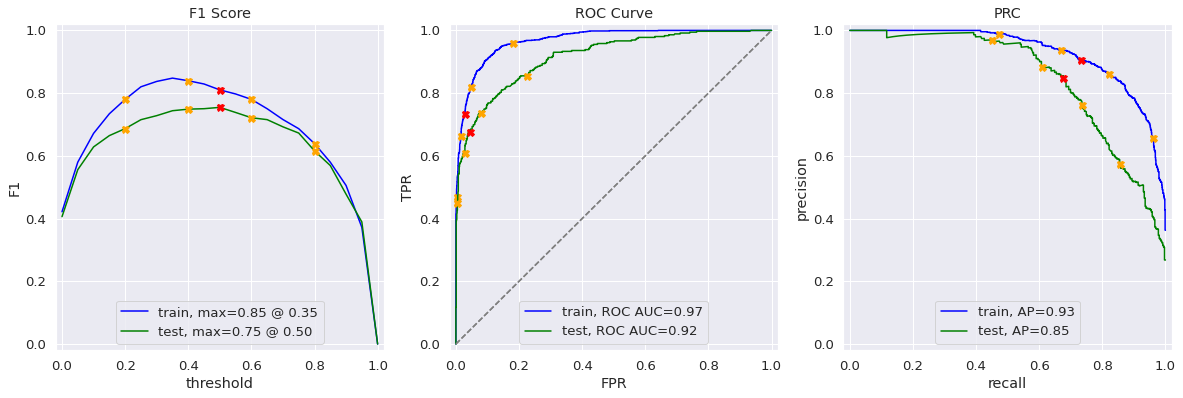

In [126]:
# Evaluate the model using the function - evaluate_model
evaluate_model(lgbm_model, ordinal_features_train, ordinal_target_train, ordinal_features_test, ordinal_target_test)

The metrics from the **LGBMClassifier model** when applied to the test set reveal teh following:

1. **Accuracy**: The model maintains a high accuracy of approximately 91% on the training set and 89% on the test set. This suggests that the model performs consistently well, showing good generalization to unseen data with a minor drop in accuracy.

2. **F1 Score**: The F1 score, indicating the balance between precision and recall, is around 0.81 on the training set and 0.75 on the test set. Although there's a decrease in performance on the test data, the model still maintains a decent ability to correctly classify the positive class.

3. **Average Precision Score (APS)**: The model showcases an APS of roughly 0.93 on the training set and 0.85 on the test set. While there's a reduction in performance on unseen data, the model still maintains a reasonably good average precision.

4. **ROC AUC**: The ROC AUC score measures the model's ability to differentiate between classes, with values closer to 1 indicating better discrimination. **The model demonstrates a strong ROC AUC score, around 0.97 on the training set and slightly lower at 0.92 on the test set, indicating excellent discriminative power, although slightly reduced in unseen data**.

In summary, **the LGBMClassifier model performs very well on the test set, demonstrating high accuracy, strong ROC AUC scores, and good average precision**.

## Perform Sanity Test

To assess the sanity of the best model, we have found - LGBM Classifier model, let's create a constant model: it predicts class "0" for any observation. And then compare it will the results of our model.

In [127]:
# Get a constant model that predicts class "0" for any observation.
target_pred_constant = pd.Series(0, index=ordinal_target_test)

# Calculate accuracy score of the constant model
accuracy_score_constant = accuracy_score(ordinal_target_test, target_pred_constant)

# Calculate the f1-score of the constant model
f1_score_constant = f1_score(ordinal_target_test, target_pred_constant)

# Print out the results
print(f'Accuracy Score for constant model: {accuracy_score_constant}')
print(f'F1 Score for constant model: {f1_score_constant}')

Accuracy Score for constant model: 0.7452093683463449
F1 Score for constant model: 0.0


In [128]:
# Predict the target using the test set features for the best model
predictions_test = lgbm_model.predict(ordinal_features_test)

# Calculate accuracy score of the best model
accuracy_score_constant = accuracy_score(ordinal_target_test, predictions_test)

# Calculate the f1-score of the best model
f1_score_constant = f1_score(ordinal_target_test, predictions_test)

# Print out the results
print(f'Accuracy Score for constant model: {accuracy_score_constant}')
print(f'F1 Score for constant model: {f1_score_constant}')

Accuracy Score for constant model: 0.8878637331440739
F1 Score for constant model: 0.7546583850931677


The best model, **LGBM Classifier**, significantly outperforms the constant model in terms of accuracy and F1 score.

# 13. Conclusion <a id='conclusion'></a>  
[Back to Contents](#contents)

In this extensive exploratory analysis, several key insights into customer behavior and service usage patterns have emerged. The analysis delved into various aspects influencing churn rates, customer preferences, and demographic characteristics. It highlighted the significant impact of contract type on churn behavior, showcasing that customers with shorter month-to-month contracts tend to exhibit much higher churn rates, while those with longer-term commitments, especially two-year contracts, display remarkable loyalty and lower churn rates. This implies a potential opportunity for the business to incentivize longer contract commitments to enhance overall retention rates.

Another pivotal observation was the popularity of streaming-related services among customers, indicating a distinct preference for entertainment-focused offerings. Moreover, the analysis unearthed insights into payment method preferences, with electronic check emerging as the most prevalent payment mode, suggesting potential advantages in focusing on enhancing electronic payment methods due to their higher adoption and users' willingness to incur higher monthly charges through these means.

Furthermore, the analysis revealed seasonal churn patterns, with higher churn rates observed during specific months such as September, October, and November. This temporal trend emphasizes the need for targeted retention strategies for customers starting their service during these months. Additionally, the inverse relationship between the number of subscribed services and churn rate highlights the importance of additional services in fostering customer loyalty, indicating that customers adopting more services exhibit significantly lower churn rates, signaling potential areas for promoting bundled service offerings to improve retention. Overall, these insights provide actionable strategies for the business to improve customer retention, tailor service offerings, and refine marketing approaches based on distinct customer behaviors and preferences.

We also trained different models for this binary classification task. But, the LGBM Classifier model has performed the best. The model demonstrates a strong ROC AUC score, around `0.97` on the training set and slightly lower at `0.92` on the test set, indicating excellent discriminative power, although slightly reduced in unseen data.